In [230]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [231]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
247,0.19657,22.0,5.86,0,0.431,6.226,79.2,8.0555,7,330,19.1,376.14,10.15,20.5
293,0.08265,0.0,13.92,0,0.437,6.127,18.4,5.5027,4,289,16.0,396.90,8.58,23.9
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6
184,0.08308,0.0,2.46,0,0.488,5.604,89.8,2.9879,3,193,17.8,391.00,13.98,26.4
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55,23.7
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666,20.2,48.45,22.74,8.4


In [232]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Отсутвующих значений нет

1) обучим модель, убрав из расчета колонки ZN, CHAS, AGE.

In [169]:
data_new = data[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV']]
X = data_new[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]
y = data_new['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_new[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.08899407 -0.07591593 -7.09802602  4.83893645 -1.06067331  0.17162054
 -0.01153874  0.00896549 -0.56447509]
Bias: 8.26768915223796
Error: 3.653238732894306


Попробуем уменьшить ошибку, уменьшив признаки

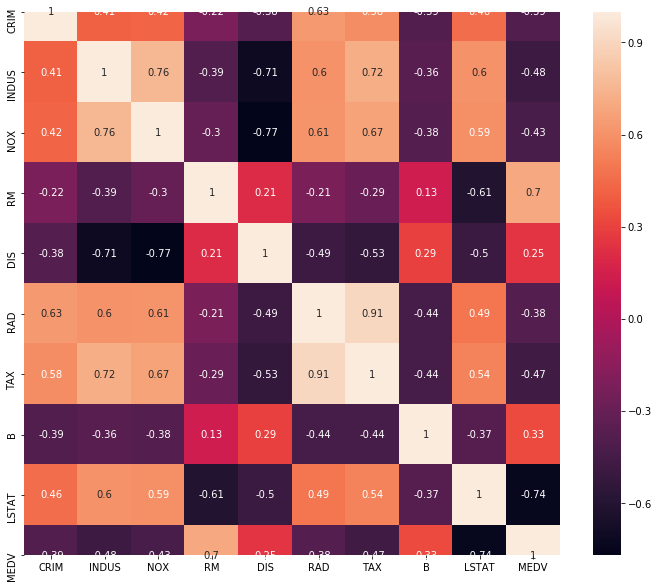

In [170]:
correlation_matrix = data_new.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

2) Видна большая корреляция между TAX и RAD. оставим TAX, тк он в большей мере коррелирует с другими признаками.

In [74]:
data_short = data[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT', 'MEDV']]
X = data_short[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']]
y = data_short['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_short[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-6.67146471e-02 -1.13927565e-01 -6.39644662e+00  4.94375048e+00
 -1.09161152e+00 -3.60110924e-03  8.48233589e-03 -5.61494309e-01]
Bias: 6.213093378926839
Error: 3.6686200649798044


3) Ошибка не уменьшилась, попробуем убрать выбросы

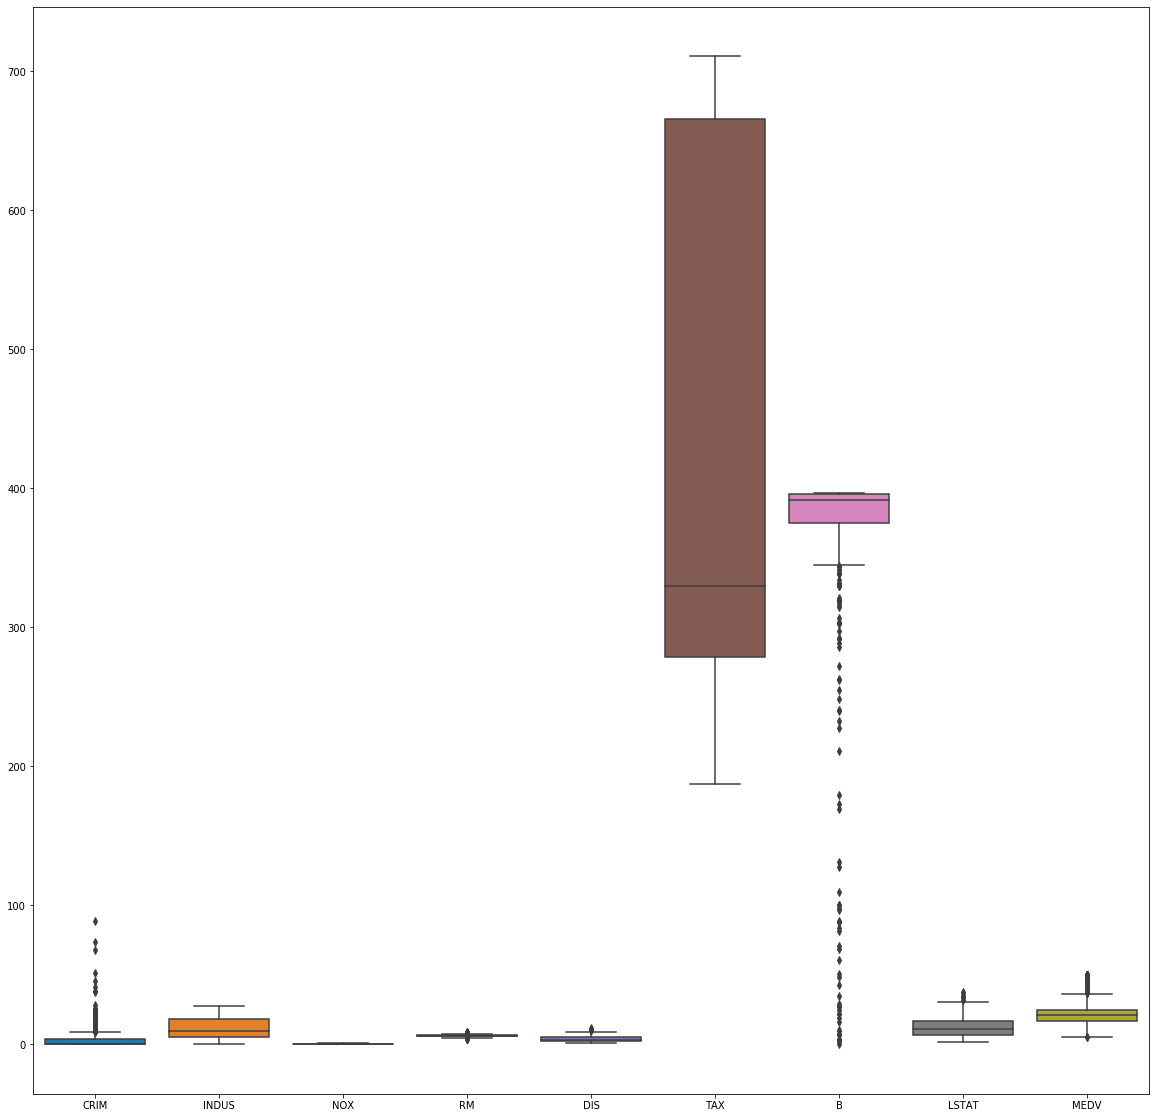

In [171]:
plt.figure(figsize=(20,20))
sns.boxplot(data=data_short)

Больше всего выбросов в признаке 'B' и 'CRIM'

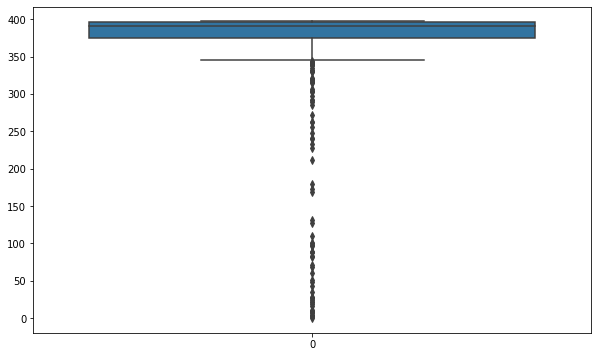

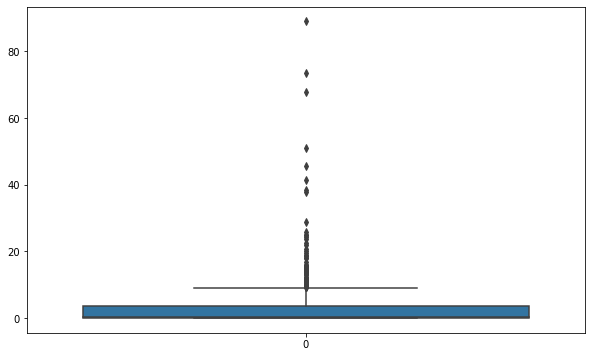

In [181]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_short.B)
plt.figure(figsize=(10,6))
sns.boxplot(data=data_short.CRIM)

Уберем данные в 'B', которые меньше 300 и в 'CRIM', которые больше 20

In [233]:
data_exclude = data_short[data_short.B > 300]
data_exclude = data_exclude[data_exclude.CRIM < 20]
data_exclude


,CRIM,INDUS,NOX,RM,DIS,TAX,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,4.0900,296,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,4.9671,242,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,4.9671,242,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,6.0622,222,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,6.0622,222,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,2.4786,273,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,2.2875,273,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,2.1675,273,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,2.3889,273,393.45,6.48,22.0


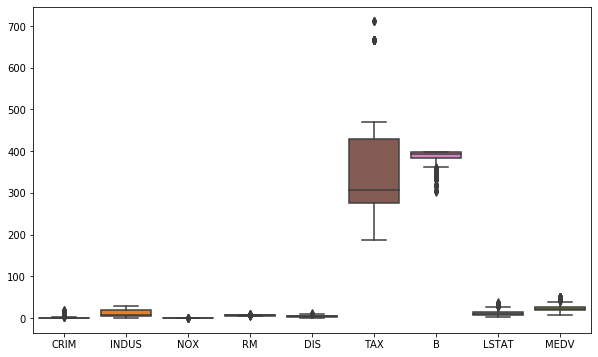

In [234]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_exclude)

уберем выбросы из 'TAX'

In [235]:
data_exclude = data_exclude[data_exclude.TAX < 500]
X = data_exclude[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']]
y = data_exclude['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_exclude[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 2.08517263e+00 -6.44644000e-02 -8.05247840e+00  9.81826896e+00
 -4.66334188e-01 -1.26340766e-02  5.16507623e-04 -1.58147712e-01]
Bias: -26.44286731156308
Error: 2.7106200009657675


Ошибка уменьшилась

4) Так как MEDV имеет сильную корреляцию с LSTAT и RM, посмотрим выбросы этих признаков

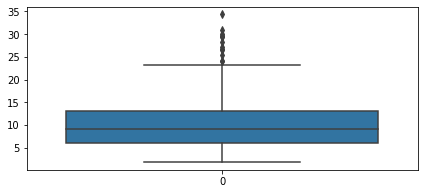

In [237]:
plt.figure(figsize=(7,3))
sns.boxplot(data=data_exclude.LSTAT)

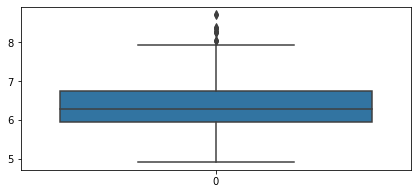

In [238]:
plt.figure(figsize=(7,3))
sns.boxplot(data=data_exclude.RM)

уберем данные больше 24 у LSTAT и больше 8 у RM

In [241]:
data_exclude = data_exclude[data_exclude.LSTAT < 24]
data_exclude = data_exclude[data_exclude.RM < 8]
X = data_exclude[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']]
y = data_exclude['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_exclude[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 1.68840531e+00 -4.80737761e-02 -9.05335202e+00  9.39995061e+00
 -5.47240872e-01 -1.13132169e-02  1.90301810e-03 -2.87826070e-01]
Bias: -22.69890867372618
Error: 2.6128157998244634


ошибка стала еще меньше, но данных осталось всего 331 строка

In [242]:
data_exclude

,CRIM,INDUS,NOX,RM,DIS,TAX,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,4.0900,296,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,4.9671,242,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,4.9671,242,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,6.0622,222,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,6.0622,222,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,2.4786,273,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,2.2875,273,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,2.1675,273,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,2.3889,273,393.45,6.48,22.0
